## Data Description
- Age : age of the patient [years]
- Sex: sex of the patient [1: Male, 0: Female]
- ChestPainType: chest pain type [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [1: Yes, 0: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\yadag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.shape # Checking the shape of data

(918, 12)

In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# Checking the null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Checking Duplicates
data.duplicated().sum()

0

### Detecting outliers

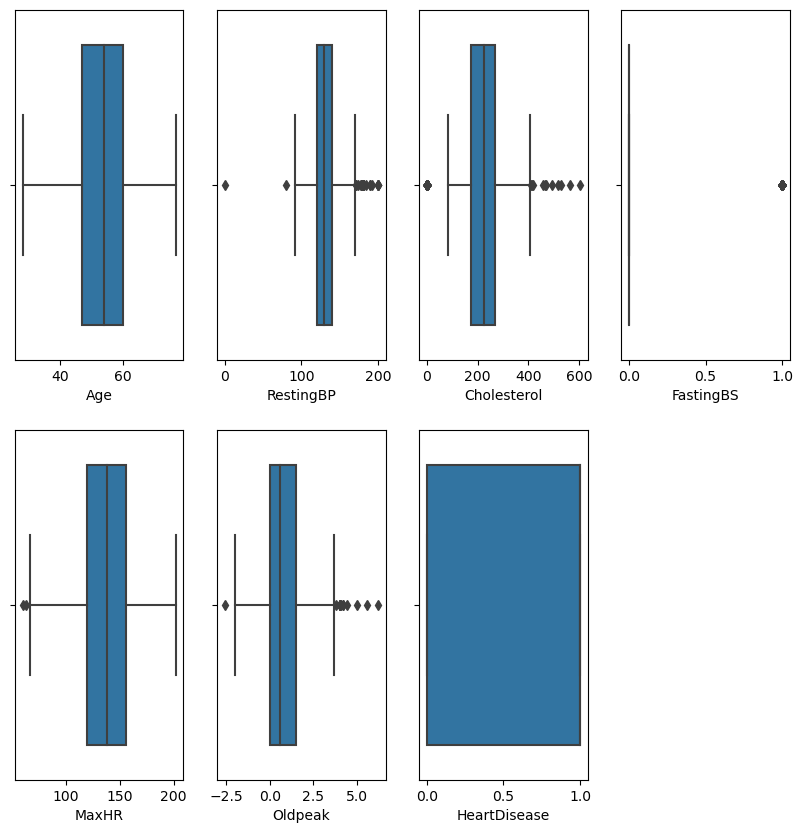

In [9]:
lst = data.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    if i < len(lst):
        sns.boxplot(x=data[lst[i]], ax=ax)
    else:
        ax.axis('off')
plt.show();

- There are outliers majorly present in the RestingBP, Cholesterol, Oldpeak.

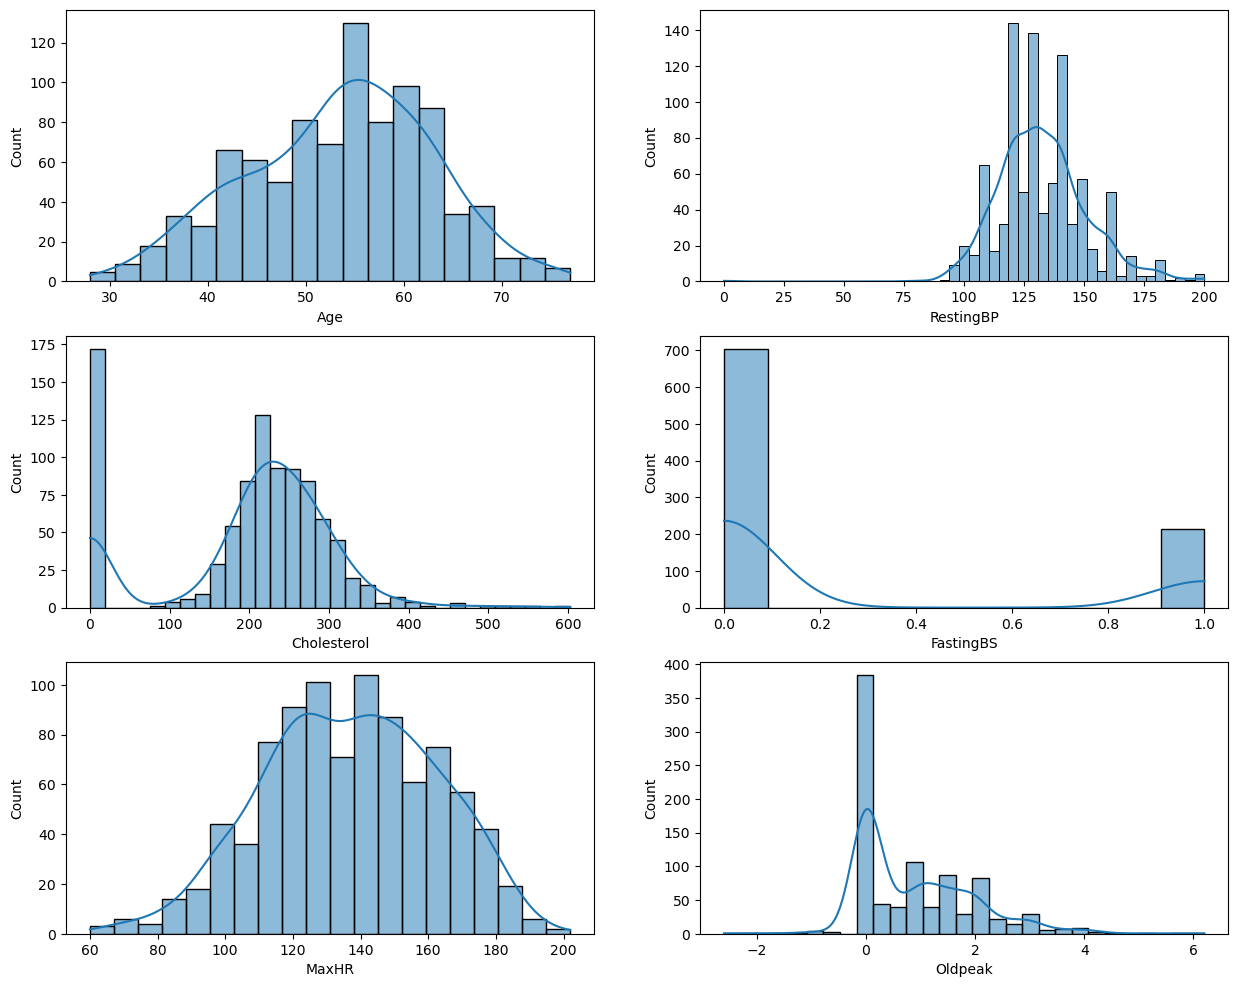

In [10]:
fig, axes = plt.subplots(3,2 , figsize = (15,12))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(x = data[lst[i]], kde = True, ax = ax);

## Treating the outliers
#### Dropping the Outliers

In [11]:
Q1,Q2,Q3 = tuple(data.RestingBP.quantile(q=[0.20,0.50,0.90]).values)

print(Q1,Q2,Q3)

# Calculating the IQR value and for calculating the LL and UL.
IQR = Q3-Q1

# Checking the outliers in lowerlimit(LL).`
UL = Q3+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL = Q1-1.5*IQR

print(IQR,UL,LL)

120.0 130.0 160.0
40.0 220.0 60.0


In [12]:
# these are the outliers using boxplot
drop_list = data[(data.RestingBP < LL) | (data.RestingBP > UL)].index.to_list()

In [13]:
data.drop(drop_list, axis=0, inplace=True)

In [14]:
Q4,Q5,Q6 = tuple(data.Cholesterol.quantile(q=[0.20,0.50,0.75]).values)

print(Q4,Q5,Q6)

# Calculating the IQR value and for calculating the LL and UL.
IQR = Q6-Q4

# Checking the outliers in lowerlimit(LL).`
UL = Q6+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL = Q4-1.5*IQR

print(IQR,UL,LL)

139.0 223.0 267.0
128.0 459.0 -53.0


In [15]:
drop_list1 = data[(data.Cholesterol < LL) | (data.Cholesterol > UL)].index.to_list()

In [16]:
data.drop(drop_list1, axis=0, inplace=True)

In [17]:
Q7,Q8,Q9 = tuple(data.Oldpeak.quantile(q=[0.20,0.50,0.75]).values)

print(Q7,Q8,Q9)

# Calculating the IQR value and for calculating the LL and UL.
IQR = Q9-Q7

# Checking the outliers in lowerlimit(LL).`
UL = Q9+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL = Q7-1.5*IQR

print(IQR,UL,LL)

0.0 0.6 1.5
1.5 3.75 -2.25


In [18]:
drop_list2 = data[(data.Oldpeak < LL) | (data.Oldpeak > UL)].index.to_list()

In [19]:
data.drop(drop_list2, axis=0, inplace=True)

In [20]:
data.shape

(894, 12)

## Analysis

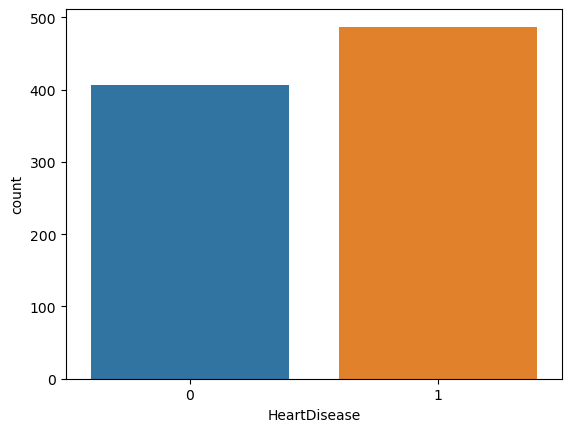

In [21]:
sns.countplot(x=data.HeartDisease);

### Insights:
* In the dataset Heart Disease 1 means paient has Heart Disease and 0 means normal.
* Count of the having Heart Disease paients are more.

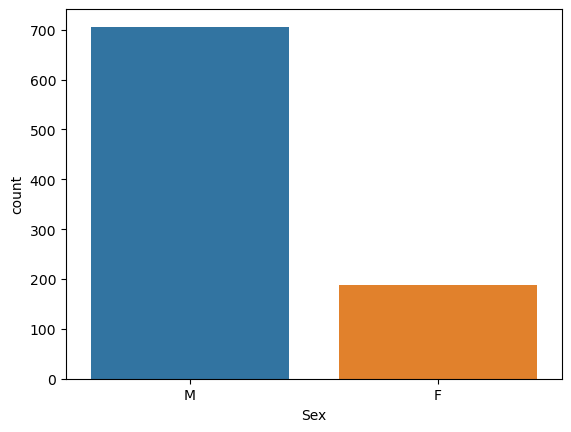

In [22]:
sns.countplot(x=data.Sex);

### Insights:
* Count of male are more compared to the female's.

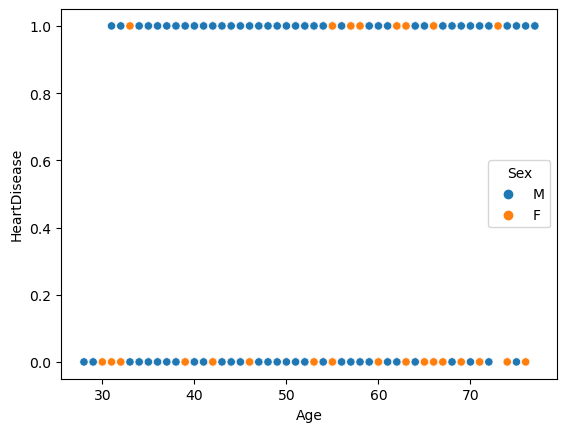

In [23]:
sns.scatterplot(x=data.Age, y=data.HeartDisease, hue=data.Sex);

### Insights:
* Male's who are having the heart Diseases are more compared to female's then we can say that male are affecting more with the Heart Disease problem with respective Age of the paitent.

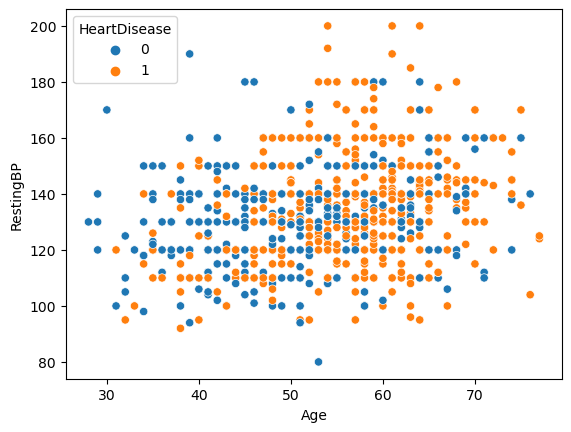

In [24]:
sns.scatterplot(x=data.Age, y=data.RestingBP, hue=data.HeartDisease);

### Insights:
* Based on the Age and resting blood pressure These are the Heart disease paitents.

## Splitting the data

In [25]:
x = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Separating Categorical and Numerical Columns on Traning data

In [27]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [28]:
X_train_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
901,58,170,225,1,146,2.8
744,60,117,230,1,160,1.4
237,55,140,295,0,136,0.0
168,58,135,222,0,100,0.0
194,41,125,184,0,180,0.0


In [29]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [30]:
X_train_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
901,F,ASY,LVH,Y,Flat
744,M,ASY,Normal,Y,Up
237,M,TA,Normal,N,Flat
168,M,ASY,Normal,N,Up
194,F,ATA,Normal,N,Up
...,...,...,...,...,...
163,M,ATA,Normal,N,Up
748,M,ASY,LVH,Y,Down
560,M,NAP,ST,N,Up
844,M,TA,LVH,N,Flat


### Scaling the Numerical Features

In [31]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
901,0.480953,2.133222,0.297547,1.790498,0.387066,2.063856
744,0.696552,-0.871031,0.343832,1.790498,0.928657,0.606828
237,0.157553,0.432701,0.945542,-0.558504,0.000216,-0.850200
168,0.480953,0.149281,0.269776,-0.558504,-1.392444,-0.850200
194,-1.351643,-0.417559,-0.081993,-0.558504,1.702357,-0.850200


### Scaling the Categorical Features

### Applying OneHotEncoding on Categorical Columns

In [32]:
# scaling the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
901,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
744,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
237,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
168,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
194,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Concatenating the Encoded Categorical Features and Transformed Numerical Features

In [33]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
901,0.480953,2.133222,0.297547,1.790498,0.387066,2.063856,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
744,0.696552,-0.871031,0.343832,1.790498,0.928657,0.606828,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
237,0.157553,0.432701,0.945542,-0.558504,0.000216,-0.850200,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
168,0.480953,0.149281,0.269776,-0.558504,-1.392444,-0.850200,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
194,-1.351643,-0.417559,-0.081993,-0.558504,1.702357,-0.850200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Separating Categorical and Numerical Columns on Test data

In [34]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
2,M,ATA,ST,N,Up
136,F,ATA,ST,N,Up
192,M,ATA,Normal,N,Up
783,F,ASY,LVH,Y,Flat
759,M,ATA,LVH,N,Up


In [35]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
2,37,130,283,0,98,0.0
136,43,120,215,0,175,0.0
192,48,130,245,0,160,0.0
783,45,138,236,0,152,0.2
759,54,192,283,0,195,0.0


In [36]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
2,-1.782842,-0.134139,0.834457,-0.558504,-1.469814,-0.850200
136,-1.136043,-0.700979,0.204976,-0.558504,1.508932,-0.850200
192,-0.597045,-0.134139,0.482688,-0.558504,0.928657,-0.850200
783,-0.920444,0.319333,0.399375,-0.558504,0.619177,-0.642053
759,0.049754,3.380271,0.834457,-0.558504,2.282632,-0.850200


In [37]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
192,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
759,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [38]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
2,-1.782842,-0.134139,0.834457,-0.558504,-1.469814,-0.850200,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
136,-1.136043,-0.700979,0.204976,-0.558504,1.508932,-0.850200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
192,-0.597045,-0.134139,0.482688,-0.558504,0.928657,-0.850200,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
783,-0.920444,0.319333,0.399375,-0.558504,0.619177,-0.642053,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
759,0.049754,3.380271,0.834457,-0.558504,2.282632,-0.850200,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
rfe = RFE(DecisionTreeClassifier(), n_features_to_select=6)
rfe = rfe.fit(X_train_transformed, y_train)

In [40]:
temp_df = pd.DataFrame({'Columns' : X_train_transformed.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,Age,True,1
1,RestingBP,True,1
2,Cholesterol,True,1
3,FastingBS,False,3
4,MaxHR,True,1
5,Oldpeak,True,1
6,Sex_M,False,4
7,ChestPainType_ATA,False,8
8,ChestPainType_NAP,False,5
9,ChestPainType_TA,False,6


In [41]:
X_train_transformed.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [42]:
X_train_transformed.drop(['FastingBS','Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y','ST_Slope_Flat' ], axis=1, inplace=True)

In [43]:
X_test_transformed.drop(['FastingBS','Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y','ST_Slope_Flat' ], axis=1, inplace=True)

In [44]:
X_train_transformed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope_Up
901,0.480953,2.133222,0.297547,0.387066,2.063856,0.0
744,0.696552,-0.871031,0.343832,0.928657,0.606828,1.0
237,0.157553,0.432701,0.945542,0.000216,-0.850200,0.0
168,0.480953,0.149281,0.269776,-1.392444,-0.850200,1.0
194,-1.351643,-0.417559,-0.081993,1.702357,-0.850200,1.0


In [45]:
X_test_transformed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope_Up
2,-1.782842,-0.134139,0.834457,-1.469814,-0.850200,1.0
136,-1.136043,-0.700979,0.204976,1.508932,-0.850200,1.0
192,-0.597045,-0.134139,0.482688,0.928657,-0.850200,1.0
783,-0.920444,0.319333,0.399375,0.619177,-0.642053,0.0
759,0.049754,3.380271,0.834457,2.282632,-0.850200,1.0


In [46]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [47]:
call = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, verbose=0,
                        mode='auto')

In [48]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 6, kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.get_weights()

[array([[ 0.68305635,  0.16184074, -0.46025917, -0.3448759 ],
        [-0.08559138, -0.7086545 , -0.0404759 ,  0.61118567],
        [ 0.06594235, -0.49969593,  0.11741418, -0.48630416],
        [-0.35091802, -0.3913945 , -0.574105  , -0.47063515],
        [-0.52837145,  0.11709154, -0.5772506 ,  0.4650588 ],
        [ 0.23988962,  0.76742065,  0.2689948 ,  0.60526574]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.09513825,  0.78067493, -0.4103461 ],
        [-0.02136296,  0.5034584 ,  0.19197571],
        [ 0.09161687,  0.55051315, -0.02778232],
        [-0.06359529,  0.84402955,  0.74963784]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.40625793, -0.4592176 ],
        [-0.26489258,  0.05685198],
        [-0.49917364, -0.00317609]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.0883263],
        [0.6797906]], dtype=float32),
 array([0.], dtype=float32)]

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 54
Trainable params: 54
Non-trainable para

In [51]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train_transformed,y_train,epochs=100,batch_size=10,validation_split=0.2, callbacks=call)

Epoch 1/100
58/58 [==============================] - 1s 5ms/step - loss: 0.7095 - accuracy: 0.5594 - val_loss: 0.7145 - val_accuracy: 0.5385
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5594 - val_loss: 0.7068 - val_accuracy: 0.5385
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5594 - val_loss: 0.7015 - val_accuracy: 0.5385
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5594 - val_loss: 0.6975 - val_accuracy: 0.5385
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5594 - val_loss: 0.6947 - val_accuracy: 0.5385
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5594 - val_loss: 0.6925 - val_accuracy: 0.5385
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5594 - val_loss: 0.6908 - val_accuracy: 0.5385
Epoch 8/100
5

In [53]:
y_pred = model.predict(X_test_transformed)
y_pred

6/6 [==============================] - 0s 1ms/step


array([[0.27484965],
       [0.26533052],
       [0.26547018],
       [0.494166  ],
       [0.26457515],
       [0.29394665],
       [0.825081  ],
       [0.84066045],
       [0.8399538 ],
       [0.8380151 ],
       [0.30382216],
       [0.8299392 ],
       [0.82812935],
       [0.26667687],
       [0.8305751 ],
       [0.83790964],
       [0.83350366],
       [0.77769214],
       [0.26670763],
       [0.83536017],
       [0.45060104],
       [0.83432543],
       [0.5014104 ],
       [0.8371629 ],
       [0.8390659 ],
       [0.83936125],
       [0.26577586],
       [0.2667839 ],
       [0.26458773],
       [0.26550084],
       [0.82994986],
       [0.26718563],
       [0.2691231 ],
       [0.32399932],
       [0.2660809 ],
       [0.26596755],
       [0.8346243 ],
       [0.59588194],
       [0.26507208],
       [0.26542673],
       [0.3695358 ],
       [0.83503675],
       [0.26835012],
       [0.2651033 ],
       [0.83040184],
       [0.8168362 ],
       [0.72281873],
       [0.779

In [54]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [55]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_test,y_pred_trans)

0.8491620111731844

In [56]:
recall_score(y_test,y_pred_trans)

0.8555555555555555

In [57]:
val_loss = history.history['val_loss']
loss = history.history['loss']

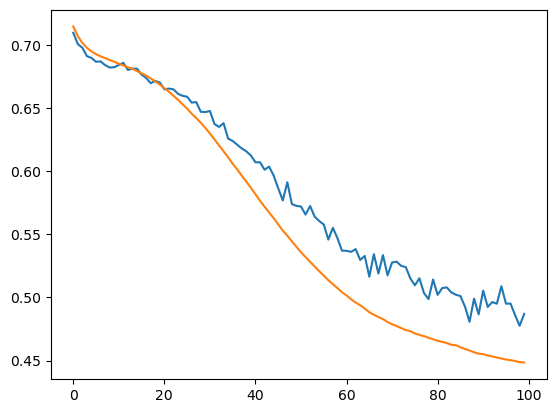

In [58]:
plt.plot(loss)
plt.plot(val_loss);

### Activation func is Relu and sigmoid kernel_initializer='he_uniform'

In [59]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim = 6, kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.get_weights()

[array([[ 0.03190064, -0.590163  ,  0.5419874 , -0.7916117 , -0.3642702 ,
          0.15432525],
        [ 0.38676667, -0.94598365, -0.71661115, -0.14792705,  0.40533566,
         -0.08070159],
        [-0.28527713,  0.38533068, -0.73228216, -0.56775236,  0.79584575,
          0.5360558 ],
        [-0.22765136, -0.8558705 ,  0.28155422,  0.89519906, -0.67777205,
          0.82338834],
        [ 0.77676463, -0.45003438,  0.285614  , -0.672596  , -0.76251507,
          0.262434  ],
        [-0.39127636, -0.33555388, -0.14709377, -0.79601216,  0.44011092,
          0.94895744]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.63989943, -0.17785168,  0.07577169,  0.5037641 , -0.1676994 ],
        [-0.566689  , -0.58730054, -0.43457216, -0.6103191 , -0.09518158],
        [-0.24400425, -0.14624214, -0.33110955,  0.5251656 , -0.7334115 ],
        [ 0.0847072 , -0.4394884 , -0.35808697,  0.5949672 , -0.27569598],
        [ 0.47268373, -0.4032537 , -0.16474557,  0.2

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 5)                 35        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 3)                 18        
                                                                 
 dropout_3 (Dropout)         (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 8         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [62]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Recall'])

In [63]:
history = model.fit(X_train_transformed,y_train,epochs=500,batch_size=10,validation_split=0.2, callbacks=call)

Epoch 1/500
58/58 [==============================] - 1s 5ms/step - loss: 0.6871 - recall: 0.5406 - val_loss: 0.6785 - val_recall: 0.5974
Epoch 2/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6791 - recall: 0.7281 - val_loss: 0.6681 - val_recall: 0.6753
Epoch 3/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6709 - recall: 0.7125 - val_loss: 0.6547 - val_recall: 0.7273
Epoch 4/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6602 - recall: 0.7344 - val_loss: 0.6345 - val_recall: 0.7273
Epoch 5/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6438 - recall: 0.7750 - val_loss: 0.6145 - val_recall: 0.7662
Epoch 6/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6317 - recall: 0.8031 - val_loss: 0.5954 - val_recall: 0.7662
Epoch 7/500
58/58 [==============================] - 0s 2ms/step - loss: 0.6290 - recall: 0.7625 - val_loss: 0.5857 - val_recall: 0.7922
Epoch 8/500
58/58 [======================

In [64]:
y_pred = model.predict(X_test_transformed)
y_pred

6/6 [==============================] - 0s 1000us/step


array([[0.12347215],
       [0.10516652],
       [0.08528343],
       [0.58515596],
       [0.12378705],
       [0.5750439 ],
       [0.69718164],
       [0.69718164],
       [0.6950114 ],
       [0.69718164],
       [0.49465007],
       [0.69718164],
       [0.6473253 ],
       [0.30512062],
       [0.69718164],
       [0.69718164],
       [0.6950114 ],
       [0.6795329 ],
       [0.23501854],
       [0.69718164],
       [0.6556117 ],
       [0.69718164],
       [0.67424524],
       [0.69718164],
       [0.69718164],
       [0.69718164],
       [0.07483023],
       [0.2466684 ],
       [0.02784508],
       [0.12379072],
       [0.69718164],
       [0.21601088],
       [0.35078397],
       [0.6578135 ],
       [0.08096651],
       [0.17940602],
       [0.69718164],
       [0.61103743],
       [0.08617554],
       [0.09649739],
       [0.34182954],
       [0.69718164],
       [0.10183215],
       [0.05931072],
       [0.69718164],
       [0.69718164],
       [0.69026756],
       [0.697

In [65]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [66]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_test,y_pred_trans)

0.8212290502793296

In [67]:
recall_score(y_test,y_pred_trans)

0.8888888888888888

In [68]:
val_loss = history.history['val_loss']
loss = history.history['loss']

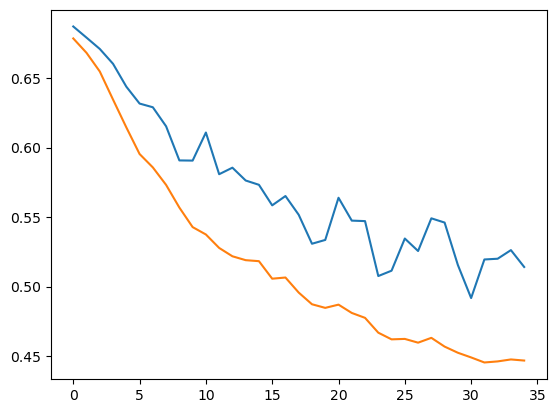

In [69]:
plt.plot(loss)
plt.plot(val_loss);

### Activation func is Relu and sigmoid kernel_initializer='he_normal'

In [81]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim = 6, kernel_initializer='he_normal'))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.get_weights()

[array([[-1.1334043 ,  0.10741313,  0.16848485,  0.13684787, -0.36846757,
         -0.41786557],
        [-1.151606  , -0.4050675 , -0.09599055, -0.05164465,  0.07065024,
         -0.20083572],
        [-0.4444551 ,  0.06522077, -0.5593467 ,  1.0424963 ,  0.4862765 ,
          0.5237626 ],
        [-0.70816004,  0.30611047, -0.24771598, -0.239885  , -0.8879204 ,
          0.40446502],
        [ 0.22201794,  0.01548259,  0.02940745, -0.8411313 , -0.5054303 ,
         -0.09556329],
        [ 0.0018065 ,  0.89492834,  0.15054709,  0.1262801 , -0.28087813,
         -1.069896  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.5100476 ,  0.18862253, -0.7155404 , -0.5884329 , -0.5811751 ],
        [-0.48813966,  0.6906268 ,  0.32597035,  0.6639903 ,  0.18924534],
        [-0.14766967, -0.06419593, -0.4191421 ,  0.25650126, -0.21898061],
        [ 0.02536982,  0.7323709 ,  0.35076088,  0.46394068,  0.44355243],
        [ 0.06373602,  0.5157431 ,  0.00401205,  0.0

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 5)                 35        
                                                                 
 dropout_6 (Dropout)         (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 3)                 18        
                                                                 
 dropout_7 (Dropout)         (None, 3)                 0         
                                                                 
 dense_17 (Dense)            (None, 2)                 8         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [84]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
history = model.fit(X_train_transformed,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
58/58 [==============================] - 1s 4ms/step - loss: 1.0759 - accuracy: 0.5262 - val_loss: 0.8467 - val_accuracy: 0.5315
Epoch 2/50
58/58 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.5909 - val_loss: 0.7032 - val_accuracy: 0.6084
Epoch 3/50
58/58 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.6503 - val_loss: 0.6519 - val_accuracy: 0.6643
Epoch 4/50
58/58 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.6434 - val_loss: 0.6316 - val_accuracy: 0.7343
Epoch 5/50
58/58 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6661 - val_loss: 0.6176 - val_accuracy: 0.7343
Epoch 6/50
58/58 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6696 - val_loss: 0.6088 - val_accuracy: 0.7692
Epoch 7/50
58/58 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6696 - val_loss: 0.6005 - val_accuracy: 0.7622
Epoch 8/50
58/58 [==

In [86]:
y_pred = model.predict(X_test_transformed)
y_pred

6/6 [==============================] - 0s 1ms/step


array([[0.07995369],
       [0.07719833],
       [0.08643697],
       [0.611656  ],
       [0.16078763],
       [0.7223839 ],
       [0.73532236],
       [0.73532236],
       [0.7284523 ],
       [0.73532236],
       [0.6199002 ],
       [0.73532236],
       [0.73532236],
       [0.38308525],
       [0.73532236],
       [0.73532236],
       [0.73532236],
       [0.7146526 ],
       [0.25151452],
       [0.73532236],
       [0.70315367],
       [0.73532236],
       [0.6982913 ],
       [0.73532236],
       [0.73532236],
       [0.7060906 ],
       [0.08242631],
       [0.23911785],
       [0.05038308],
       [0.11001512],
       [0.73532236],
       [0.24259469],
       [0.26065177],
       [0.7152183 ],
       [0.06489069],
       [0.20989157],
       [0.73532236],
       [0.69050837],
       [0.06208077],
       [0.07800073],
       [0.5445732 ],
       [0.73532236],
       [0.09855141],
       [0.03923504],
       [0.73532236],
       [0.73532236],
       [0.73220843],
       [0.735

In [87]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [88]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_test,y_pred_trans)

0.8324022346368715

In [89]:
recall_score(y_test,y_pred_trans)

0.9111111111111111

In [90]:
val_loss = history.history['val_loss']
loss = history.history['loss']

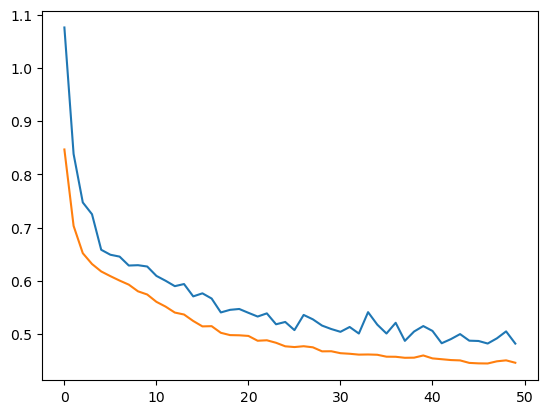

In [91]:
plt.plot(loss)
plt.plot(val_loss);

## Conculsion:
1. Accuracy score of 83.24% and recall score of 91.11 is by using relu and sigmoid as activation function.
2. **`Model Architecture:`** 
* 1 is input layer with 6 dimensions and kernel_initializer as **`he_normal`**.
* 3 hidden layer with relu activation function and with two dropout as 0.2. 
* sigmoid as the activation function used in the output layer.

____